## Problem Statement:
1. Identify why the attrition is higher ?
2. Identify the root cause of attrition ?

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
dataset = pd.read_excel("/Users/rishavdas/Downloads/Data/HR_Employee_Attrition-1.xlsx")
dataset.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         1            80   
1              1  ...                         4            80   
2              1  ...                         2            80   
3              1  ...                         3            80   
4              1  ...                         4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [3]:
dataset.shape

(2940, 35)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
dataset.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
dataset.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
for i in dataset.select_dtypes('object').columns:
    dataset[i] = dataset[i].astype('category')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2940 non-null   int64   
 1   Attrition                 2940 non-null   category
 2   Age                       2940 non-null   int64   
 3   BusinessTravel            2940 non-null   category
 4   DailyRate                 2940 non-null   int64   
 5   Department                2940 non-null   category
 6   DistanceFromHome          2940 non-null   int64   
 7   Education                 2940 non-null   int64   
 8   EducationField            2940 non-null   category
 9   EmployeeCount             2940 non-null   int64   
 10  EnvironmentSatisfaction   2940 non-null   int64   
 11  Gender                    2940 non-null   category
 12  HourlyRate                2940 non-null   int64   
 13  JobInvolvement            2940 non-null   int64 

In [7]:
dataset.describe().T

count          mean          std     min      25%  \
EmployeeNumber            2940.0   1470.500000   848.849221     1.0   735.75   
Age                       2940.0     36.923810     9.133819    18.0    30.00   
DailyRate                 2940.0    802.485714   403.440447   102.0   465.00   
DistanceFromHome          2940.0      9.192517     8.105485     1.0     2.00   
Education                 2940.0      2.912925     1.023991     1.0     2.00   
EmployeeCount             2940.0      1.000000     0.000000     1.0     1.00   
EnvironmentSatisfaction   2940.0      2.721769     1.092896     1.0     2.00   
HourlyRate                2940.0     65.891156    20.325969    30.0    48.00   
JobInvolvement            2940.0      2.729932     0.711440     1.0     2.00   
JobLevel                  2940.0      2.063946     1.106752     1.0     1.00   
JobSatisfaction           2940.0      2.728571     1.102658     1.0     2.00   
MonthlyIncome             2940.0   6502.931293  4707.155770  1009.0  2911.00   
MonthlyRate               2940.0  14313.103401  7116.575021  2094.0  8045.00   
NumCompaniesWorked        2940.0      2.693197     2.497584     0.0     1.00   
PercentSalaryHike         2940.0     15.209524     3.659315    11.0    12.00   
PerformanceRating         2940.0      3.153741     0.360762     3.0     3.00   
RelationshipSatisfaction  2940.0      2.712245     1.081025     1.0     2.00   
StandardHours             2940.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          2940.0      0.793878     0.851932     0.0     0.00   
TotalWorkingYears         2940.0     11.279592     7.779458     0.0     6.00   
TrainingTimesLastYear     2940.0      2.799320     1.289051     0.0     2.00   
WorkLifeBalance           2940.0      2.761224     0.706356     1.0     2.00   
YearsAtCompany            2940.0      7.008163     6.125483     0.0     3.00   
YearsInCurrentRole        2940.0      4.229252     3.622521     0.0     2.00   
YearsSinceLastPromotion   2940.0      2.187755     3.221882     0.0     0.00   
YearsWithCurrManager      2940.0      4.123129     3.567529     0.0     2.00   

                              50%       75%      max  
EmployeeNumber             1470.5   2205.25   2940.0  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     84.00    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8380.00  19999.0  
MonthlyRate               14235.5  20462.00  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [ ]:
3 steps of Analysis:
1. Univariate Analysis 

2, Bivriate Analysis

3. Multivariate analysis

In [9]:
dataset.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [8]:
dataset.Attrition.value_counts(normalize=True).mul(100).round(2).astype('str') + '%'

No     83.88%
Yes    16.12%
Name: Attrition, dtype: object

## Univariate Continous Data Analysis

In [10]:
def continuos_univariate_analysis(data,
                                  feature,
                                  figsize=(12, 8),
                                  kde=False,
                                ):
    f1, (ax_box,
         ax_hist) = plt.subplots(nrows=2,
                                 sharex=True,
                                 gridspec_kw={'height_ratios': (0.25, 0.75)},
                                 figsize=figsize)
    sns.color_palette("viridis", as_cmap=True)
    sns.boxplot(data=data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='yellow')
    sns.histplot(data=data, x=feature, ax=ax_hist, kde=kde, color='blue')
    ax_hist.axvline(data[feature].mean(), color='cyan', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='orange', linestyle="-")

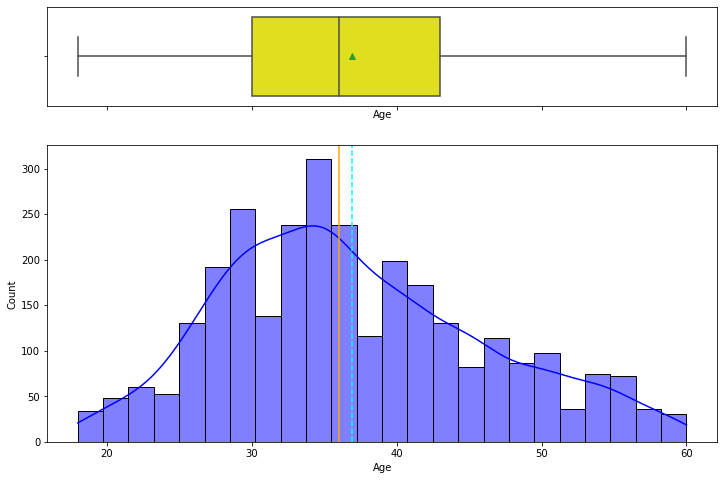

In [12]:
continuos_univariate_analysis(dataset, 'Age', kde=True)

## Observations:
1. Age is normally distributed 
2. Majority of the employees do have age between 28 - 43 years 
3. Slightly left skewed 
4. no outliers observed 
5. the orgnaization has more young employees
6. Avg Age is 36 years 
7. No such significant difference in age observed for those who are leaving the organization 


In [40]:
dataset.Attrition.value_counts(normalize=True).mul(100).round(1).astype('str')+'%'

No     83.9%
Yes    16.1%
Name: Attrition, dtype: object

In [41]:
dataset.groupby(['Attrition'])['Age'].mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

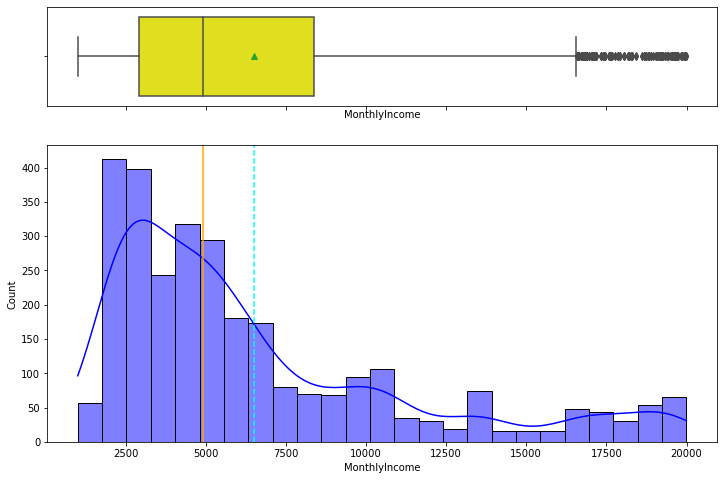

In [42]:
continuos_univariate_analysis(dataset, 'MonthlyIncome', kde=True)

In [14]:
dataset[dataset['MonthlyIncome']>16000].groupby('JobRole').agg({'EmployeeNumber':'count'})

EmployeeNumber
JobRole                          
Manager                       162
Research Director              90

In [15]:
dataset[(dataset['MonthlyIncome'] > 16000)
        & (dataset['Attrition'] == 'Yes')].groupby(
            ['Attrition', 'JobRole']).agg({'MonthlyIncome': 'mean'})

MonthlyIncome
Attrition JobRole                         
Yes       Manager             19509.333333
          Research Director   19395.500000

In [19]:
dataset[dataset['MonthlyIncome']<=16000].groupby(['Attrition', 'JobRole']).agg({'MonthlyIncome':'mean'}).reset_index()\
    .pivot_table(index='JobRole', columns='Attrition', values='MonthlyIncome')

Attrition                            No           Yes
JobRole                                              
Healthcare Representative   7453.557377   8548.222222
Human Resources             4391.750000   3715.750000
Laboratory Technician       3337.223350   2919.258065
Manager                    13498.473684  12729.500000
Manufacturing Director      7289.925926   7365.500000
Research Director          13158.600000           NaN
Research Scientist          3328.122449   2780.468085
Sales Executive             6804.617100   7489.000000
Sales Representative        2798.440000   2364.727273

In [18]:
dataset[dataset['MonthlyIncome'] <= 16000].groupby(['Attrition']).agg({
    'MonthlyIncome':
    'mean',
    'EmployeeNumber':
    'count'
})

MonthlyIncome  EmployeeNumber
Attrition                               
No           5601.936151            2224
Yes          4470.784483             464

## Observation:
1. Majority of the employees are earning between 2900 dollars to 8000 dollar per month 
2. On avg, monthly income is 6000 dollars
3. Those who are earning more than 16000 dollars are treated as outliers 
4. 242 employees are earning more than 16000 dollars 
5. less than 1% attrition happend for higher salary bracket 
6. Those are in higher salary bracket, mostly they are from leadership stacks (Manager/Directors)
7. On avg, those who left the organization were earning less amount of 800 dollars than others 
**MonthlyIncome impacts Attrition linearly**

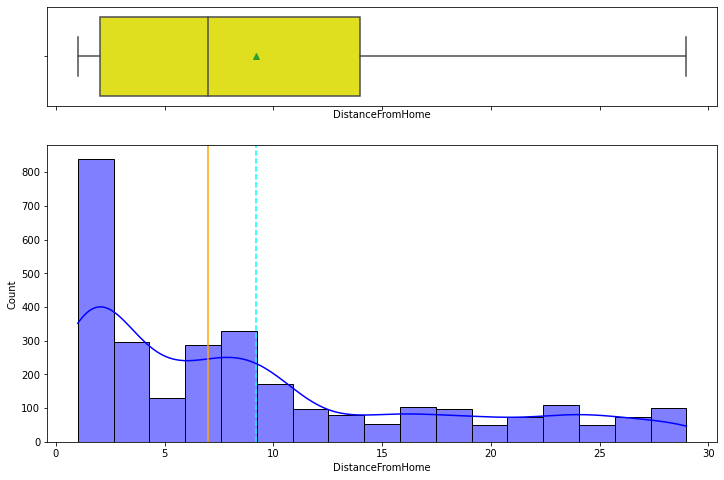

In [51]:
continuos_univariate_analysis(dataset, 'DistanceFromHome', kde=True)

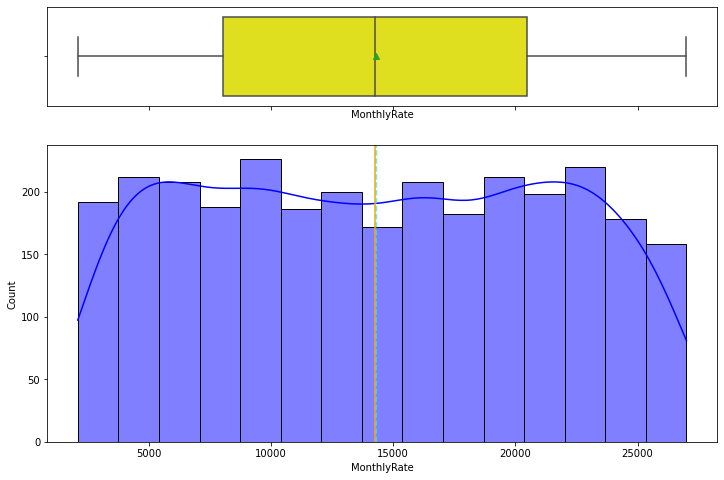

In [20]:
continuos_univariate_analysis(dataset, 'MonthlyRate', kde=True)

In [52]:
dataset.groupby(['Attrition']).agg({'DistanceFromHome':'mean', 'Age':'mean'})

DistanceFromHome        Age
Attrition                             
No                 8.915653  37.561233
Yes               10.632911  33.607595

**Binning Technique**

In [69]:
dataset['DistanceFromHome'].value_counts(bins=[0,10, 15, 30], sort=False)

(-0.001, 10.0]    2052
(10.0, 15.0]       230
(15.0, 30.0]       658
Name: DistanceFromHome, dtype: int64

In [66]:
bins = [0, 10, 15, 30]
labels = ["Short_distance", "Moderate_distance", "Higher_distance"]
dataset['distance_class'] = pd.cut(x=dataset['DistanceFromHome'],
                                   bins=bins,
                                   labels=labels,
                                   include_lowest=True)

In [70]:
dataset.groupby(['Attrition', 'distance_class']).agg({'EmployeeNumber':'count', 'MonthlyIncome':'mean'})

EmployeeNumber  MonthlyIncome
Attrition distance_class                                  
No        Short_distance               1764    6875.893424
          Moderate_distance             180    6796.722222
          Higher_distance               522    6699.329502
Yes       Short_distance                288    4557.256944
          Moderate_distance              50    6402.760000
          Higher_distance               136    4679.808824

## Observation :

1. Majority of them live between 0 - 10 km of distance from office location 
2. very less of number of employees are staying far from office 
3. No significant distance observed between those who left and those who stayed(only 2km on avg greater than those who left) 
4. Those who stay far away/nearby  from the office with lower salary than average are likely to leave the organization 

**Distance with lower income matters**